In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [101]:
## load the dataset
df = pd.read_csv("all_month.csv")
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.171300,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.800,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.330,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.940,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
5,2023-01-22T01:39:22.975Z,61.718800,-147.698300,31.60,1.60,ml,NaN,NaN,NaN,1.09,...,2023-01-22T01:41:06.653Z,"10 km SSW of Glacier View, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
6,2023-01-22T01:34:08.410Z,38.780334,-122.763664,1.36,1.56,md,28.0,71.0,0.009736,0.04,...,2023-01-22T02:07:12.146Z,"1km WNW of The Geysers, CA",earthquake,0.23,0.340,0.150,28.0,automatic,nc,nc
7,2023-01-22T01:30:07.418Z,19.020400,-64.866100,35.00,3.10,ml,15.0,279.0,0.670000,0.43,...,2023-01-22T01:35:30.040Z,"75 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,7.68,2.026,0.067,29.0,reviewed,us,us
8,2023-01-22T01:21:10.430Z,34.645000,-119.050833,0.33,1.44,ml,23.0,53.0,0.098230,0.25,...,2023-01-22T01:24:43.155Z,"22km SSW of Frazier Park, CA",earthquake,0.33,0.650,0.174,28.0,automatic,ci,ci
9,2023-01-22T01:08:32.306Z,58.134400,-155.487900,21.30,0.80,ml,NaN,NaN,NaN,0.87,...,2023-01-22T01:11:11.187Z,Alaska Peninsula,earthquake,NaN,1.100,NaN,NaN,automatic,ak,ak


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

In [103]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

In [104]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9409.000000,6823.000000,6822.000000,5053.000000,9410.000000,6347.000000,9410.000000,6745.000000,6810.000000
mean,40.694347,-117.863831,25.593011,1.645013,23.403635,119.461838,0.747333,0.294069,1.698991,2.083547,0.276723,15.534655
std,20.430642,66.380624,54.697555,1.230108,22.145048,62.376305,2.697378,0.276421,3.095408,15.786392,0.477658,23.290696
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,9.000000,70.000000,0.014850,0.090000,0.260000,0.420000,0.110000,5.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,31.000000,157.000000,0.196200,0.470000,0.860000,1.400000,0.248000,18.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


In [105]:
missing_values = (df[['latitude','longitude','depth','mag','nst','gap','dmin','rms','horizontalError','depthError','magError','magNst']]==0).sum()
missing_values

latitude             0
longitude            0
depth              143
mag                 15
nst                  1
gap                  0
dmin                 9
rms                 15
horizontalError      0
depthError          65
magError            57
magNst               3
dtype: int64

In [106]:
df[['latitude','longitude','depth','mag','nst','gap','dmin','rms','horizontalError','depthError','magError','magNst']] = df[['latitude','longitude','depth','mag','nst','gap','dmin','rms','horizontalError','depthError','magError','magNst']].replace({0:np.nan})

In [107]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth               143
mag                  16
magType               1
nst                2588
gap                2588
dmin               4366
rms                  15
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError           65
magError           2722
magNst             2603
status                0
locationSource        0
magSource             0
dtype: int64

In [212]:
df.head(10)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.000000,101.000000,0.171300,0.1500,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.330000,0.80,0.144000,12.000000,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.000000,33.000000,0.748666,0.0200,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.170000,0.33,0.180000,34.000000,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,23.407065,119.461838,0.748666,0.5000,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,1.698991,0.50,0.279081,15.541501,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.000000,117.000000,0.748666,0.1900,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.680000,0.94,1.790000,14.000000,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,23.407065,119.461838,0.748666,0.1300,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,1.698991,0.30,0.279081,15.541501,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,2022-12-23T02:44:45.937Z,63.282800,-150.606500,127.70,2.00,ml,23.407065,119.461838,0.748666,0.3900,...,2023-01-07T03:06:05.369Z,"62 km ESE of Denali National Park, Alaska",earthquake,1.698991,0.50,0.279081,15.541501,reviewed,ak,ak
9406,2022-12-23T02:42:28.843Z,38.180500,-117.813900,7.90,1.40,ml,16.000000,133.870000,0.122000,0.1421,...,2022-12-23T17:26:10.304Z,"34 km SE of Mina, Nevada",earthquake,1.698991,1.60,0.300000,4.000000,reviewed,nn,nn
9407,2022-12-23T02:41:04.040Z,38.829666,-122.791664,1.50,1.13,md,24.000000,45.000000,0.008791,0.0300,...,2022-12-23T03:09:14.609Z,"6km W of Cobb, CA",earthquake,0.190000,0.35,0.130000,24.000000,automatic,nc,nc
9408,2022-12-23T02:30:14.282Z,63.368900,-153.228800,7.10,1.60,ml,23.407065,119.461838,0.748666,0.7400,...,2023-01-14T00:17:55.844Z,"70 km NE of Nikolai, Alaska",earthquake,1.698991,0.30,0.279081,15.541501,reviewed,ak,ak


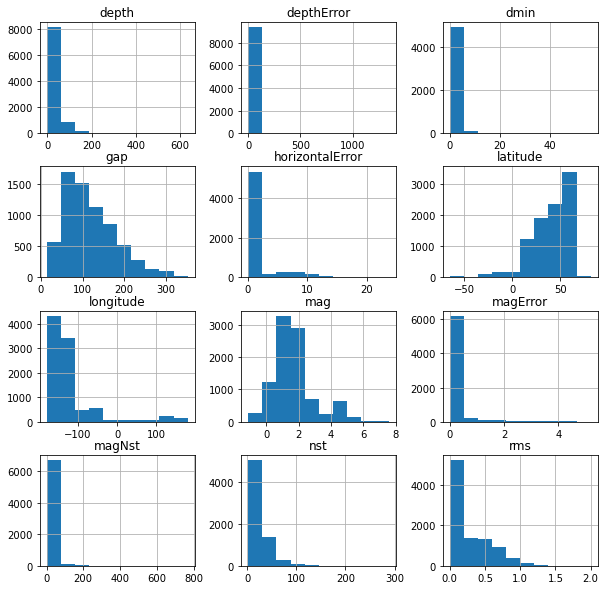

In [109]:
df.hist(bins= 10, figsize=(10,10))
plt.show()

In [110]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['depth'] = df['depth'].fillna(df['depth'].mean())
df['mag'] = df['mag'].fillna(df['mag'].mean())
df['nst'] = df['nst'].fillna(df['nst'].mean())
df['gap'] = df['gap'].fillna(df['gap'].mean())
df['dmin'] = df['dmin'].fillna(df['dmin'].mean())
df['rms'] = df['rms'].fillna(df['rms'].mean())
df['horizontalError'] = df['horizontalError'].fillna(df['horizontalError'].mean())
df['depthError'] = df['depthError'].fillna(df['depthError'].mean())
df['magError'] = df['magError'].fillna(df['magError'].mean())
df['magNst'] = df['magNst'].fillna(df['magNst'].mean())

df.head(10)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.000000,101.000000,0.171300,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.330000,0.800,0.144000,12.000000,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.000000,33.000000,0.748666,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.170000,0.330,0.180000,34.000000,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,23.407065,119.461838,0.748666,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,1.698991,0.500,0.279081,15.541501,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.000000,117.000000,0.748666,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.680000,0.940,1.790000,14.000000,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,23.407065,119.461838,0.748666,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,1.698991,0.300,0.279081,15.541501,automatic,ak,ak
5,2023-01-22T01:39:22.975Z,61.718800,-147.698300,31.60,1.60,ml,23.407065,119.461838,0.748666,1.09,...,2023-01-22T01:41:06.653Z,"10 km SSW of Glacier View, Alaska",earthquake,1.698991,0.200,0.279081,15.541501,automatic,ak,ak
6,2023-01-22T01:34:08.410Z,38.780334,-122.763664,1.36,1.56,md,28.000000,71.000000,0.009736,0.04,...,2023-01-22T02:07:12.146Z,"1km WNW of The Geysers, CA",earthquake,0.230000,0.340,0.150000,28.000000,automatic,nc,nc
7,2023-01-22T01:30:07.418Z,19.020400,-64.866100,35.00,3.10,ml,15.000000,279.000000,0.670000,0.43,...,2023-01-22T01:35:30.040Z,"75 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,7.680000,2.026,0.067000,29.000000,reviewed,us,us
8,2023-01-22T01:21:10.430Z,34.645000,-119.050833,0.33,1.44,ml,23.000000,53.000000,0.098230,0.25,...,2023-01-22T01:24:43.155Z,"22km SSW of Frazier Park, CA",earthquake,0.330000,0.650,0.174000,28.000000,automatic,ci,ci
9,2023-01-22T01:08:32.306Z,58.134400,-155.487900,21.30,0.80,ml,23.407065,119.461838,0.748666,0.87,...,2023-01-22T01:11:11.187Z,Alaska Peninsula,earthquake,1.698991,1.100,0.279081,15.541501,automatic,ak,ak


In [111]:
df.mean()

latitude            40.694347
longitude         -117.863831
depth               25.987939
mag                  1.647640
nst                 23.407065
gap                119.461838
dmin                 0.748666
rms                  0.294538
horizontalError      1.698991
depthError           2.098040
magError             0.279081
magNst              15.541501
dtype: float64

In [30]:
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.000000,101.000000,0.171300,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.330000,0.800,0.144000,12.000000,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.000000,33.000000,0.748666,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.170000,0.330,0.180000,34.000000,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,23.407065,119.461838,0.748666,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,1.698991,0.500,0.279081,15.541501,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.000000,117.000000,0.748666,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.680000,0.940,1.790000,14.000000,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,23.407065,119.461838,0.748666,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,1.698991,0.300,0.279081,15.541501,automatic,ak,ak
5,2023-01-22T01:39:22.975Z,61.718800,-147.698300,31.60,1.60,ml,23.407065,119.461838,0.748666,1.09,...,2023-01-22T01:41:06.653Z,"10 km SSW of Glacier View, Alaska",earthquake,1.698991,0.200,0.279081,15.541501,automatic,ak,ak
6,2023-01-22T01:34:08.410Z,38.780334,-122.763664,1.36,1.56,md,28.000000,71.000000,0.009736,0.04,...,2023-01-22T02:07:12.146Z,"1km WNW of The Geysers, CA",earthquake,0.230000,0.340,0.150000,28.000000,automatic,nc,nc
7,2023-01-22T01:30:07.418Z,19.020400,-64.866100,35.00,3.10,ml,15.000000,279.000000,0.670000,0.43,...,2023-01-22T01:35:30.040Z,"75 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,7.680000,2.026,0.067000,29.000000,reviewed,us,us
8,2023-01-22T01:21:10.430Z,34.645000,-119.050833,0.33,1.44,ml,23.000000,53.000000,0.098230,0.25,...,2023-01-22T01:24:43.155Z,"22km SSW of Frazier Park, CA",earthquake,0.330000,0.650,0.174000,28.000000,automatic,ci,ci
9,2023-01-22T01:08:32.306Z,58.134400,-155.487900,21.30,0.80,ml,23.407065,119.461838,0.748666,0.87,...,2023-01-22T01:11:11.187Z,Alaska Peninsula,earthquake,1.698991,1.100,0.279081,15.541501,automatic,ak,ak


In [112]:
corr_mat = df.corr()
corr_mat

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,-0.526669,-0.184363,-0.560330,-0.253588,0.076815,-0.323168,0.068287,-0.440587,-0.041892,-0.067720,-0.137089
longitude,-0.526669,1.000000,0.163558,0.614826,0.321525,-0.082841,0.291926,0.224586,0.604051,0.048077,-0.178858,0.279855
depth,-0.184363,0.163558,1.000000,0.400917,0.232227,-0.038879,0.165024,0.331373,0.496289,0.044998,-0.006165,0.219056
mag,-0.560330,0.614826,0.400917,1.000000,0.540461,-0.050548,0.410328,0.518197,0.725083,0.060630,-0.009148,0.411203
nst,-0.253588,0.321525,0.232227,0.540461,1.000000,-0.387363,0.195715,0.307690,0.320440,0.001718,0.046102,0.577263
gap,0.076815,-0.082841,-0.038879,-0.050548,-0.387363,1.000000,-0.010779,-0.022990,0.042761,0.049256,0.090225,-0.240012
dmin,-0.323168,0.291926,0.165024,0.410328,0.195715,-0.010779,1.000000,0.284229,0.577623,0.021149,-0.025997,0.192465
rms,0.068287,0.224586,0.331373,0.518197,0.307690,-0.022990,0.284229,1.000000,0.543740,0.033905,-0.068346,0.262294
horizontalError,-0.440587,0.604051,0.496289,0.725083,0.320440,0.042761,0.577623,0.543740,1.000000,0.079858,-0.111253,0.310452
depthError,-0.041892,0.048077,0.044998,0.060630,0.001718,0.049256,0.021149,0.033905,0.079858,1.000000,-0.015942,0.015505


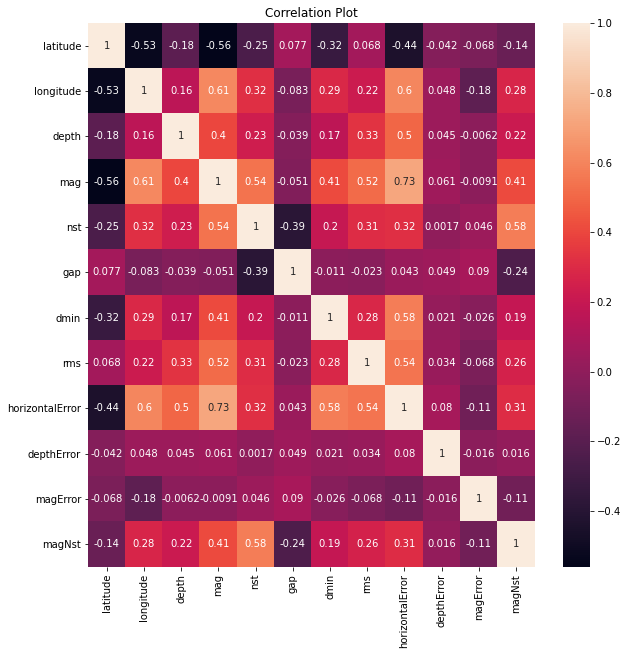

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Plot')
plt.show()

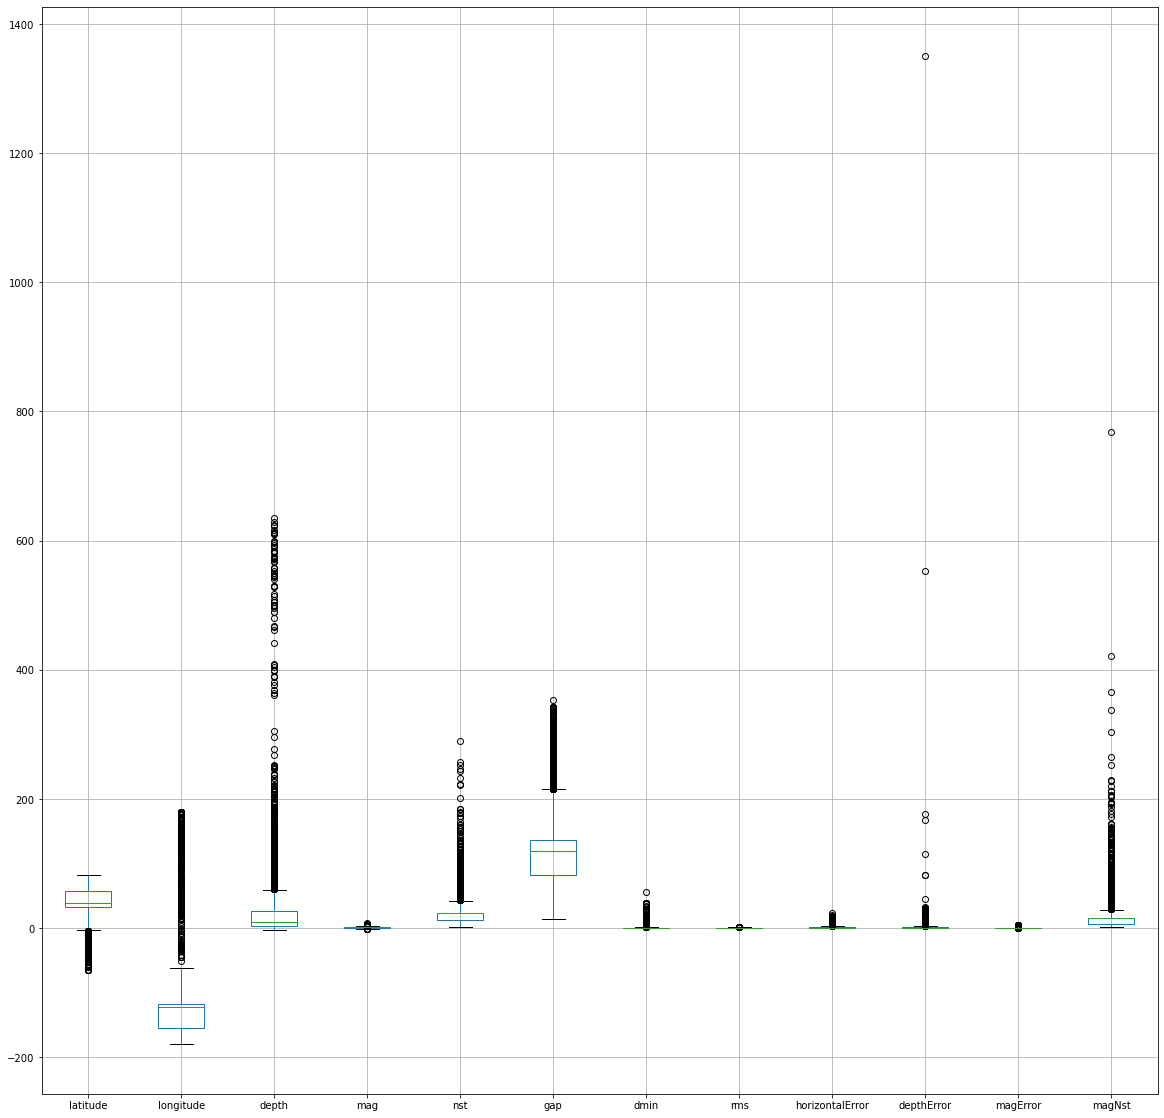

In [114]:
df.boxplot(figsize=(20,20))
plt.show()

In [123]:

 df.groupby(['status']).count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,type,horizontalError,depthError,magError,magNst,locationSource,magSource
status,,,,,,,,,,,,,,,,,,,,,
automatic,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,...,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204
reviewed,7206,7206,7206,7206,7206,7205,7206,7206,7206,7206,...,7206,7206,7206,7206,7206,7206,7206,7206,7206,7206


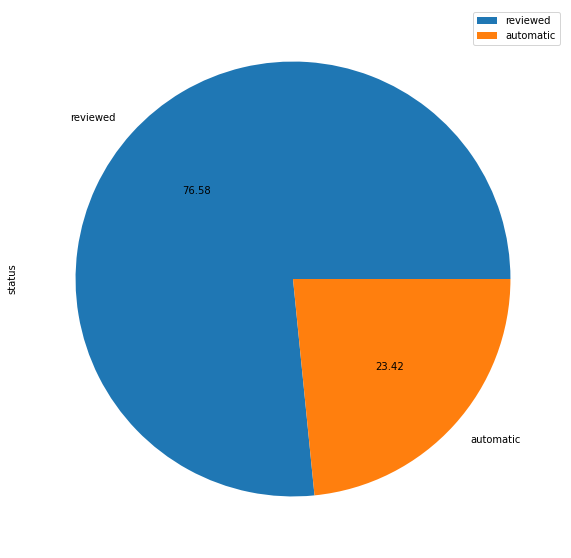

In [206]:
status = pd.DataFrame(df['status'].value_counts())
status.reset_index(inplace=True)
fig, ax = plt.subplots()
status.plot(kind = 'pie', y = 'status', labels = status['index'], autopct = '%1.2f', ax=ax, figsize=(10,10))

In [190]:
 df.groupby(['type']).count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
type,,,,,,,,,,,,,,,,,,,,,
earthquake,9323,9323,9323,9323,9323,9322,9323,9323,9323,9323,...,9323,9323,9323,9323,9323,9323,9323,9323,9323,9323
explosion,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
ice quake,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
other event,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
quarry blast,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


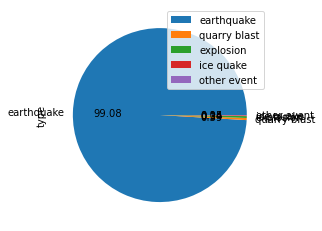

In [191]:
type = pd.DataFrame(df['type'].value_counts())
type.reset_index(inplace=True)
fig, ax = plt.subplots()
type.plot(kind = 'pie', y = 'type', labels = type['index'], autopct = '%1.2f', ax=ax)

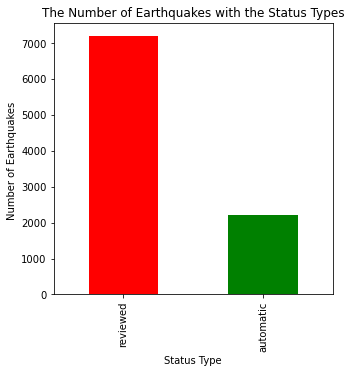

In [192]:
plt.figure(figsize=(5,5))
df['status'].value_counts().plot(kind='bar', color = ['red','green'])
plt.xlabel('Status Type')
plt.ylabel('Number of Earthquakes ')
plt.title('The Number of Earthquakes with the Status Types')
plt.show()

In [193]:
 df.groupby(['type']).count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
type,,,,,,,,,,,,,,,,,,,,,
earthquake,9323,9323,9323,9323,9323,9322,9323,9323,9323,9323,...,9323,9323,9323,9323,9323,9323,9323,9323,9323,9323
explosion,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
ice quake,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
other event,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
quarry blast,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


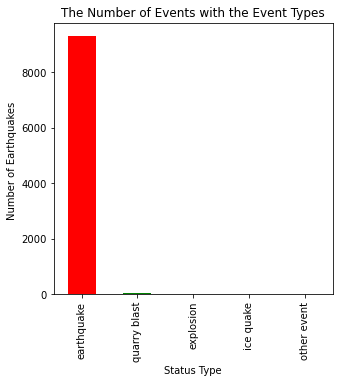

In [194]:
plt.figure(figsize=(5,5))
df['type'].value_counts().plot(kind='bar', color = ['red','green'])
plt.xlabel('Status Type')
plt.ylabel('Number of Earthquakes ')
plt.title('The Number of Events with the Event Types')
plt.show()

In [195]:
 df.groupby(['place']).count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
place,,,,,,,,,,,,,,,,,,,,,
"0 km E of Greenhorn, California",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"0 km E of Paxton, California",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"0 km ENE of Benson, Utah",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"0 km ENE of Big Lake, Alaska",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"0 km ESE of Avard, Oklahoma",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"southern Xinjiang, China",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"southwest of Sumatra, Indonesia",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
west of Macquarie Island,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [196]:
 df.groupby(['mag']).count()

,time,latitude,longitude,depth,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
mag,,,,,,,,,,,,,,,,,,,,,
-1.12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-0.99,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
-0.98,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.20,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6.30,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6.80,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [197]:
 df.groupby(['depth']).count()

,time,latitude,longitude,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
depth,,,,,,,,,,,,,,,,,,,,,
-3.330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-3.290,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-3.270,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-3.200,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-3.050,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616.059,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
622.502,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
624.212,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [198]:
 df.groupby(['magType']).count()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
magType,,,,,,,,,,,,,,,,,,,,,
mb,738,738,738,738,738,738,738,738,738,738,...,738,738,738,738,738,738,738,738,738,738
mb_lg,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
md,2696,2696,2696,2696,2696,2696,2696,2696,2696,2696,...,2696,2696,2696,2696,2696,2696,2696,2696,2696,2696
mh,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
ml,5840,5840,5840,5840,5840,5840,5840,5840,5840,5840,...,5840,5840,5840,5840,5840,5840,5840,5840,5840,5840
mw,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
mwc,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mwr,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
mww,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91


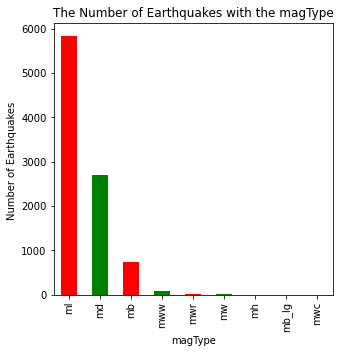

In [199]:
plt.figure(figsize=(5,5))
df['magType'].value_counts().plot(kind='bar', color = ['red','green'])
plt.xlabel('magType')
plt.ylabel('Number of Earthquakes ')
plt.title('The Number of Earthquakes with the magType')
plt.show()

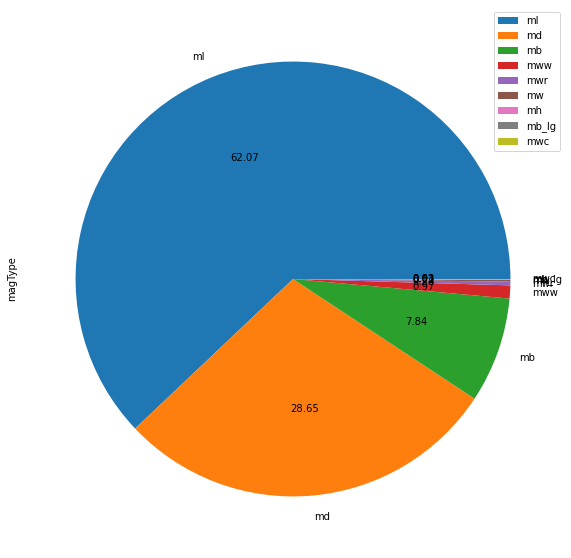

In [209]:
magType = pd.DataFrame(df['magType'].value_counts())
magType.reset_index(inplace=True)
fig, ax = plt.subplots()
magType.plot(kind = 'pie', y = 'magType', labels = magType['index'], autopct = '%1.2f', ax=ax,figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB9ADEAC40>],
      dtype=object)

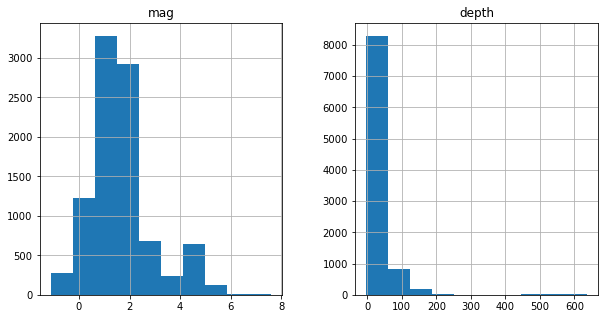

In [201]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
df.hist(column ='mag', ax = ax[0])
df.hist(column ='depth', bins = 10, ax = ax[1])
